In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

np.random.seed(5)

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

In [3]:
# synt = Synthesizer(dim=5, workers_num=3, random_seed=15)

In [4]:
# gen = Generator(synt)
# gen.generate(pieces_num=7, lower_bound=40, upper_bound=80, alternating=True)
# gen.draw_merged()

In [5]:
# algo = Algorithm(gen, total_time=gen.total_time, period=10, train_window=10, a=-300, b=300)
# algo.run()


In [6]:
def draw():
    fig, ax = plt.subplots(synt.workers_num+3, 1, figsize=(15, 10), sharex=True, height_ratios=np.r_[np.ones(synt.workers_num+2), 3])
    # ax[0].sharey(ax[2])
    for i, px in enumerate(algo.init_points):
        # plt.axvline(p, color='grey', linestyle='--')
        # if i % 60 == 0:
        #     ax[0].axvline(px, linestyle='--')
        if i in gen.stamps[:synt.workers_num]:
            ax[0].axvline(px, linestyle='--', color='green')
       
    for stamp in gen.stamps:
        for i in range(4):
            ax[i+1].axvline(stamp, color='orange')
    ax[0].plot(np.arange(algo.total_time), algo.responses, label="Real responses", color='black')
    ax[0].plot(np.arange(algo.total_time), algo.master_predictions_all, label="Master predictions", color='red')
    plt.subplots_adjust(hspace=0.1)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Value")
    ax[0].xaxis.set_ticks_position('top')
    ax[0].legend()
    for i in range(synt.workers_num):
        ax[i+1].sharey(ax[i+2])
        ax[i+1].plot(np.arange(algo.total_time), algo.experts_losses_all.T[gen.stamps[i]], label=f"Expert {i+1} losses", color='green') #BAG
        ax[i+1].set_ylabel("Loss")
        ax[i+1].legend()
    ml=synt.workers_num+1
    mc=synt.workers_num+2
    ax[ml].plot(np.arange(algo.total_time), algo.master_losses_all, label="Master losses", color='red')
    ax[ml].set_ylabel("Loss")
    ax[ml].legend()
    ax[mc].plot(np.arange(algo.total_time), algo.master_losses_all.cumsum(), label="Master cumulative losses", color='red')
    ax[mc].set_ylabel("Loss")
    ax[mc].legend()
    
    plt.show()

In [7]:
synt = Synthesizer(dim=4, workers_num=3, random_seed=18)
gen = Generator(synt)
gen.generate(pieces_num=7, lower_bound=100, upper_bound=120, alternating=True)
algo = Algorithm(gen, total_time=gen.total_time, period=1, train_window=50, a=-100, b=100)
algo.run()

 17%|██████████████████                                                                                     | 134/766 [00:00<00:00, 1316.91it/s]

Time 0 weights: 0.0 0.0 0.0
Time 50 weights: 0.0 0.0 0.0
Time 100 weights: 0.0 0.0 0.0
Time 150 weights: 0.00021724636715659946 0.0 0.0
Time 200 weights: 0.9651943263644911 0.0 0.0
Time 250 weights: 2.3704776686124114 8.327488868662718e-05 0.0


 35%|████████████████████████████████████                                                                    | 266/766 [00:00<00:01, 445.93it/s]

Time 300 weights: -0.1243528925065059 -0.12554578265445634 0.0


 44%|██████████████████████████████████████████████                                                          | 339/766 [00:00<00:01, 316.19it/s]

Time 350 weights: 2.0988194037703143 2.10498969428808 4.81312287806943e-05


 55%|█████████████████████████████████████████████████████████▌                                              | 424/766 [00:01<00:01, 222.03it/s]

Time 400 weights: 8.153907878282695 7.944644040830954 8.286270353247886


 62%|████████████████████████████████████████████████████████████████▍                                       | 475/766 [00:01<00:01, 178.07it/s]

Time 450 weights: 0.07993314992299759 0.0801125156842536 0.07962316026902665


 67%|█████████████████████████████████████████████████████████████████████▌                                  | 512/766 [00:02<00:01, 150.63it/s]

Time 500 weights: 2.5093537706071745 2.5275763569931455 2.484386841087084


 74%|████████████████████████████████████████████████████████████████████████████▉                           | 567/766 [00:02<00:01, 117.87it/s]

Time 550 weights: -0.817161162734838 -0.8126565889981996 -0.8151163402568014


 80%|███████████████████████████████████████████████████████████████████████████████████                     | 612/766 [00:03<00:01, 100.65it/s]

Time 600 weights: 0.12988386276904287 0.12890568589831744 0.129270893315658


 86%|██████████████████████████████████████████████████████████████████████████████████████████▌              | 661/766 [00:03<00:01, 88.23it/s]

Time 650 weights: -0.25226723034038284 -0.2522907230762285 -0.25562819237235257


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 715/766 [00:04<00:00, 80.60it/s]

Time 700 weights: 1.374678064311935 1.3823027091764086 1.3512902881405664


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 764/766 [00:05<00:00, 75.03it/s]

Time 750 weights: -0.7795222281632018 -0.7752883457900449 -0.7671969996837811


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 766/766 [00:05<00:00, 149.35it/s]


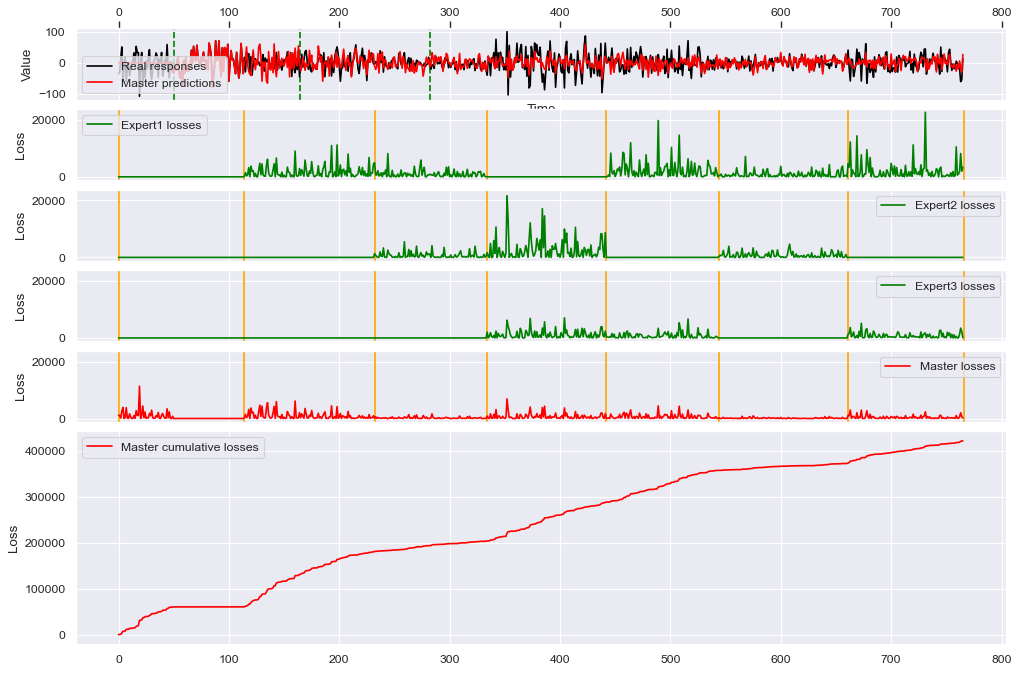

In [8]:
draw()

In [9]:
algo.responses

array([-3.42182623e+01, -3.10339421e+01,  1.31288223e+01,  5.08475247e+01,
       -6.22297675e+01, -5.80526147e-01,  1.82840460e+01, -6.16755226e+01,
       -1.34324751e+01,  1.37186189e+00, -4.06226323e+01, -2.21448212e+01,
       -2.74163092e+00,  6.00598193e+00,  3.21547628e+01, -7.75629177e+00,
        5.25191545e+01,  3.28454062e+01,  3.26681792e+01, -1.06509359e+02,
       -1.25198173e+00,  3.30203790e+01, -6.62274609e+01, -1.78271866e+01,
       -4.76824303e+01,  6.36697134e+00, -1.86215698e+01,  1.39316289e+01,
        4.21279517e+01, -3.08989923e+01, -5.42190864e+01, -1.55419348e+01,
        8.67168037e+00,  1.20438636e+01,  3.16092980e+01,  2.17794184e+01,
       -4.60424447e+01,  1.25329880e+01, -1.34283676e+00,  3.31333665e+01,
       -4.23407130e+01, -2.53162561e+01,  1.17221831e+01, -8.55085600e+00,
        5.85219344e+01, -1.70556278e+01, -4.81051131e+01,  4.12147493e+00,
        1.89179385e+00, -2.80310629e+01, -3.17024612e+01, -1.74021648e+01,
       -2.36280223e+01,  